# 01- Import the libraries

In [1]:
from sklearn.ensemble import RandomForestClassifier
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import xml.etree.ElementTree as Xet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import itertools
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# 02- Exploratory Data Analysis

In [2]:
def normalize_column(df,column):
    return MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))
    


In [3]:
dataset_path = r'../input/car-crashes-severity-prediction'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [4]:
df.describe()

,ID,Lat,Lng,Distance(mi),Severity
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,3203.000000,37.765653,-122.405990,0.135189,2.293429
std,1849.685919,0.032555,0.028275,0.396360,0.521225
min,0.000000,37.609619,-122.510440,0.000000,1.000000
25%,1601.500000,37.737096,-122.412210,0.000000,2.000000
50%,3203.000000,37.768238,-122.404835,0.000000,2.000000
75%,4804.500000,37.787813,-122.392477,0.041000,3.000000
max,6406.000000,37.825626,-122.349734,6.820000,4.000000


In [5]:
def plott(df,col1,col2):
    CrosstabResult=pd.crosstab(index=df[col1],columns=df[col2])
    print(CrosstabResult)
    %matplotlib inline 
    CrosstabResult.plot.bar()

In [6]:
df = df.drop(columns=['ID', 'Bump', 'No_Exit', 'Give_Way', 'Roundabout'])
df

,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,timestamp
0,37.762150,-122.405660,0.044,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,37.719157,-122.448254,0.000,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,37.808498,-122.366852,0.000,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,37.785930,-122.391080,0.009,False,True,False,False,False,R,1,2020-03-29 19:48:43
4,37.719141,-122.448457,0.000,False,False,False,False,False,R,2,2019-10-09 08:47:00
...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0.368,False,False,False,False,False,R,3,2017-10-01 18:36:13
6403,37.752755,-122.402790,0.639,False,True,False,False,False,R,2,2018-10-23 07:40:27
6404,37.726304,-122.446015,0.000,False,True,False,False,False,R,2,2019-10-28 15:45:00
6405,37.808090,-122.367211,0.000,False,True,False,False,False,R,3,2019-05-04 13:45:31


In [7]:
df['timestamp']

0       2016-03-25 15:13:02
1       2020-05-05 19:23:00
2       2016-09-16 19:57:16
3       2020-03-29 19:48:43
4       2019-10-09 08:47:00
               ...         
6402    2017-10-01 18:36:13
6403    2018-10-23 07:40:27
6404    2019-10-28 15:45:00
6405    2019-05-04 13:45:31
6406    2020-02-28 19:43:00
Name: timestamp, Length: 6407, dtype: object

In [8]:
df['timestamp_hour'] = pd.to_datetime(df['timestamp'])
df['timestamp_hour'] = df['timestamp_hour'].dt.strftime('%Y-%m-%d %H')
df['timestamp_normal'] = pd.to_datetime(df['timestamp'])
df['timestamp_normal'] = df['timestamp_normal'].dt.strftime('%Y-%m-%d')

df['Date']= pd.to_datetime(df['timestamp'])


df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['hour'] = df['Date'].dt.hour


df['x']=np.cos(df['Lat']) * np.cos(df['Lng'])
df['y']=np.cos(df['Lat']) * np.sin(df['Lng'])
df['z']=np.sin(df['Lat'])
df['loc']=df['x']*df['y']*df['z']

df

,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,...,timestamp_normal,Date,day,month,year,hour,x,y,z,loc
0,37.762150,-122.405660,0.044,False,False,False,False,True,R,2,...,2016-03-25,2016-03-25 15:13:02,25,3,2016,15,-0.991254,-0.115960,0.062996,0.007241
1,37.719157,-122.448254,0.000,False,False,False,False,False,R,2,...,2020-05-05,2020-05-05 19:23:00,5,5,2020,19,-0.997073,-0.073778,0.020044,0.001474
2,37.808498,-122.366852,0.000,False,False,False,True,False,R,3,...,2016-09-16,2016-09-16 19:57:16,16,9,2016,19,-0.982066,-0.153714,0.109168,0.016480
3,37.785930,-122.391080,0.009,False,True,False,False,False,R,1,...,2020-03-29,2020-03-29 19:48:43,29,3,2020,19,-0.987693,-0.130167,0.086709,0.011148
4,37.719141,-122.448457,0.000,False,False,False,False,False,R,2,...,2019-10-09,2019-10-09 08:47:00,9,10,2019,8,-0.997089,-0.073575,0.020028,0.001469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0.368,False,False,False,False,False,R,3,...,2017-10-01,2017-10-01 18:36:13,1,10,2017,18,-0.992632,-0.113837,0.041506,0.004690
6403,37.752755,-122.402790,0.639,False,True,False,False,False,R,2,...,2018-10-23,2018-10-23 07:40:27,23,10,2018,7,-0.991461,-0.118869,0.053617,0.006319
6404,37.726304,-122.446015,0.000,False,True,False,False,False,R,2,...,2019-10-28,2019-10-28 15:45:00,28,10,2019,15,-0.996737,-0.075997,0.027189,0.002060
6405,37.808090,-122.367211,0.000,False,True,False,False,False,R,3,...,2019-05-04,2019-05-04 13:45:31,4,5,2019,13,-0.982165,-0.153369,0.108763,0.016383


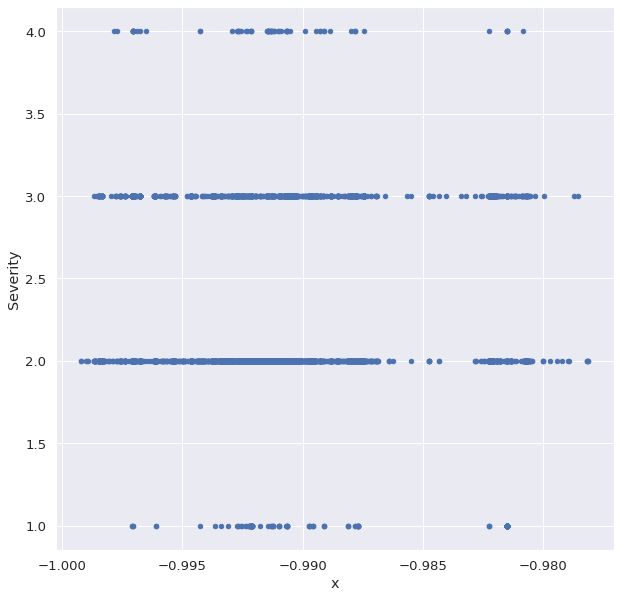

In [9]:
df.plot(x ='x', y='Severity', kind = 'scatter')
plt.show()


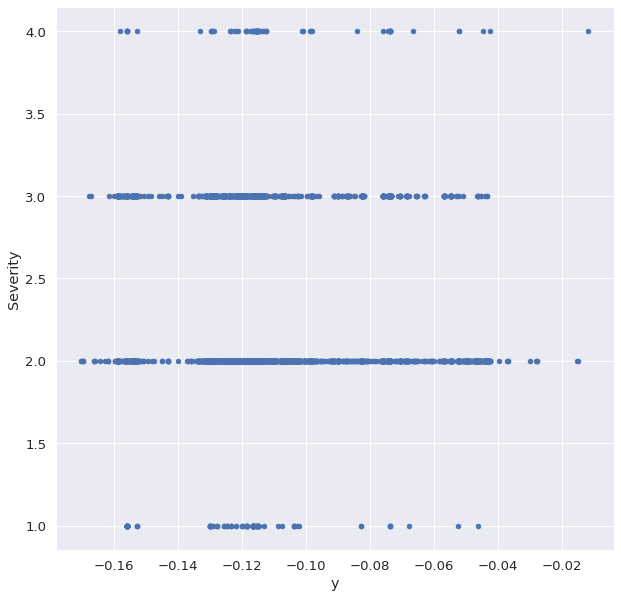

In [10]:
df.plot(x ='y', y='Severity', kind = 'scatter')
plt.show()

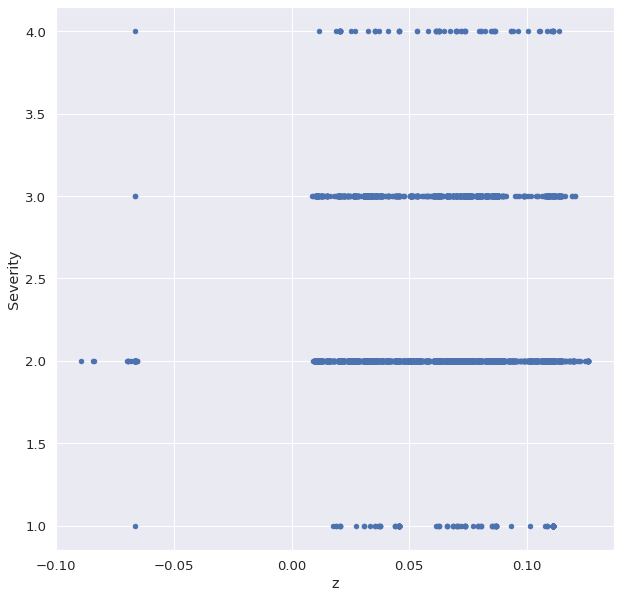

In [11]:
df.plot(x ='z', y='Severity', kind = 'scatter')
plt.show()

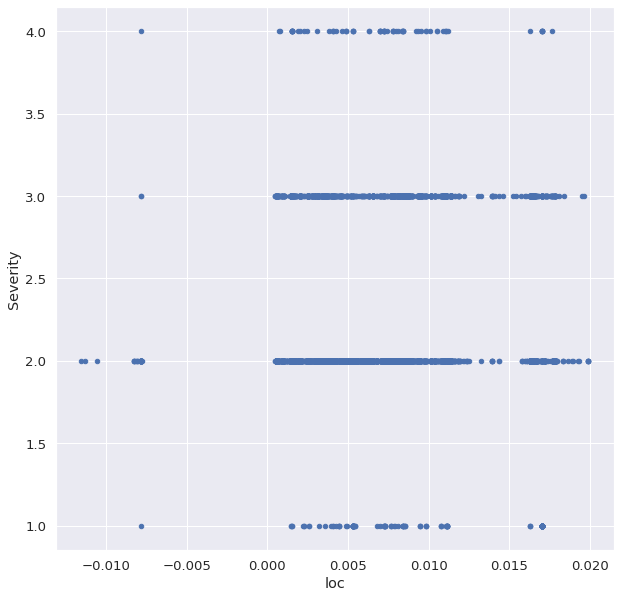

In [12]:
df.plot(x ='loc', y='Severity', kind = 'scatter')
plt.show()

# Encoding df

In [13]:
def encoding(dataset, cols):
    for col_name in cols:
        if dataset[col_name].dtypes == 'bool':
            dataset[col_name] = dataset[col_name].astype(int)
        else:
            dataset[col_name] = dataset[col_name].replace({'L': 1, 'R': 0})
            
    return dataset

In [14]:
df = encoding(df, ['Crossing', 'Junction', 'Railway', 'Stop', 'Amenity', 'Side'])
df.describe()


,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,day,month,year,hour,x,y,z,loc
count,6407.000000,6407.000000,6407.000000,6407.00000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.135189,0.08241,0.246449,0.026533,0.097706,0.037147,0.050726,2.293429,15.656626,6.744498,2018.407835,12.873888,-0.990149,-0.115478,0.066459,0.007919
std,0.032555,0.028275,0.396360,0.27501,0.430977,0.160728,0.296939,0.189136,0.219454,0.521225,8.750849,3.568445,1.375794,5.824203,0.004465,0.027893,0.032478,0.004959
min,37.609619,-122.510440,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2016.000000,0.000000,-0.999199,-0.170299,-0.089373,-0.011531
25%,37.737096,-122.412210,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,4.000000,2017.000000,8.000000,-0.992632,-0.128825,0.037976,0.004252
50%,37.768238,-122.404835,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,7.000000,2019.000000,14.000000,-0.991270,-0.116754,0.069071,0.007250
75%,37.787813,-122.392477,0.041000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,23.000000,10.000000,2020.000000,17.000000,-0.988172,-0.109619,0.088585,0.010739
max,37.825626,-122.349734,6.820000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,31.000000,12.000000,2020.000000,23.000000,-0.978129,-0.011649,0.126177,0.019893


In [15]:
df

,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,...,timestamp_normal,Date,day,month,year,hour,x,y,z,loc
0,37.762150,-122.405660,0.044,0,0,0,0,1,0,2,...,2016-03-25,2016-03-25 15:13:02,25,3,2016,15,-0.991254,-0.115960,0.062996,0.007241
1,37.719157,-122.448254,0.000,0,0,0,0,0,0,2,...,2020-05-05,2020-05-05 19:23:00,5,5,2020,19,-0.997073,-0.073778,0.020044,0.001474
2,37.808498,-122.366852,0.000,0,0,0,1,0,0,3,...,2016-09-16,2016-09-16 19:57:16,16,9,2016,19,-0.982066,-0.153714,0.109168,0.016480
3,37.785930,-122.391080,0.009,0,1,0,0,0,0,1,...,2020-03-29,2020-03-29 19:48:43,29,3,2020,19,-0.987693,-0.130167,0.086709,0.011148
4,37.719141,-122.448457,0.000,0,0,0,0,0,0,2,...,2019-10-09,2019-10-09 08:47:00,9,10,2019,8,-0.997089,-0.073575,0.020028,0.001469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0.368,0,0,0,0,0,0,3,...,2017-10-01,2017-10-01 18:36:13,1,10,2017,18,-0.992632,-0.113837,0.041506,0.004690
6403,37.752755,-122.402790,0.639,0,1,0,0,0,0,2,...,2018-10-23,2018-10-23 07:40:27,23,10,2018,7,-0.991461,-0.118869,0.053617,0.006319
6404,37.726304,-122.446015,0.000,0,1,0,0,0,0,2,...,2019-10-28,2019-10-28 15:45:00,28,10,2019,15,-0.996737,-0.075997,0.027189,0.002060
6405,37.808090,-122.367211,0.000,0,1,0,0,0,0,3,...,2019-05-04,2019-05-04 13:45:31,4,5,2019,13,-0.982165,-0.153369,0.108763,0.016383


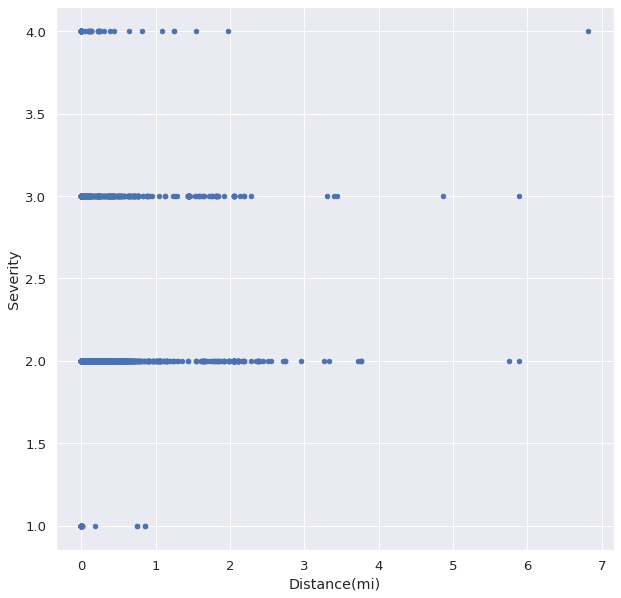

In [16]:
df.plot(x ='Distance(mi)', y='Severity', kind = 'scatter')
plt.show()

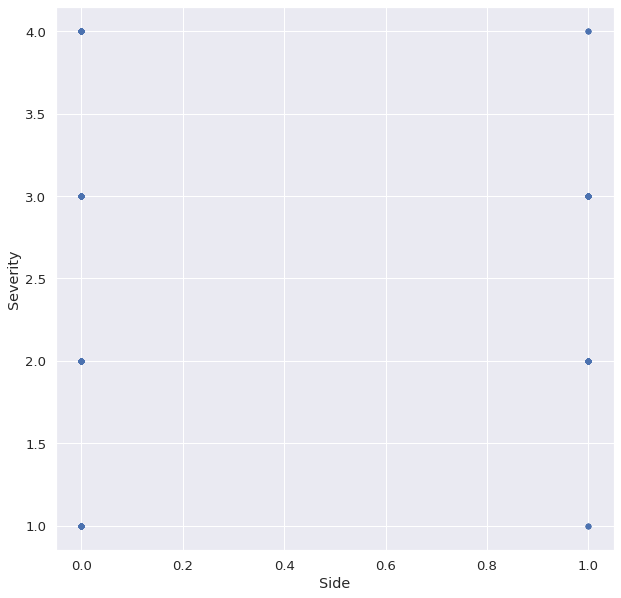

Severity    1     2     3   4
Side                         
0         122  4078  1813  69
1           7   268    42   8


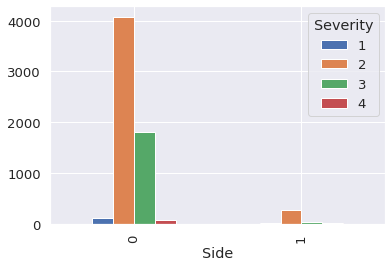

In [17]:
df.plot(x ='Side', y='Severity', kind = 'scatter')
plt.show()

plott(df,'Side','Severity')

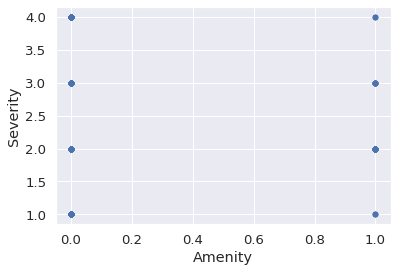

Severity    1     2     3   4
Amenity                      
0         123  4135  1839  72
1           6   211    16   5


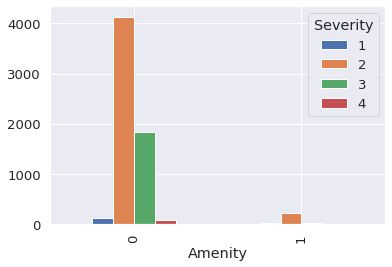

In [18]:
df.plot(x ='Amenity', y='Severity', kind = 'scatter')
plt.show()
plott(df,'Amenity','Severity')

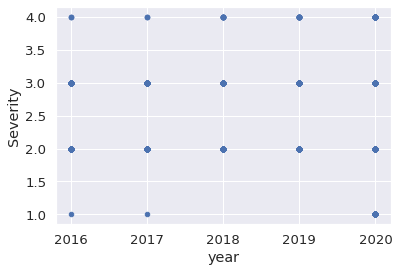

Severity    1     2    3   4
year                        
2016        1   524  289   3
2017        1   623  401   3
2018        0   613  473  11
2019        0  1272  369  14
2020      127  1314  323  46


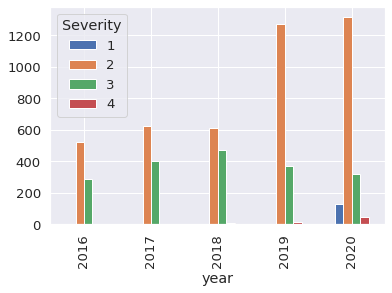

In [19]:
df.plot(x ='year', y='Severity', kind = 'scatter')
plt.show()
plott(df,'year','Severity')

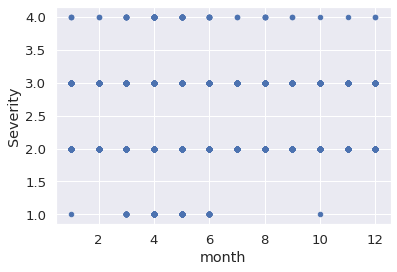

Severity   1    2    3   4
month                     
1          1  351  151   3
2          0  375  139   2
3         15  319  158   9
4         58  293  179  25
5         36  358  177  18
6         18  287  176   7
7          0  169  131   2
8          0  304  138   5
9          0  436  160   2
10         1  459  160   1
11         0  459  152   1
12         0  536  134   2


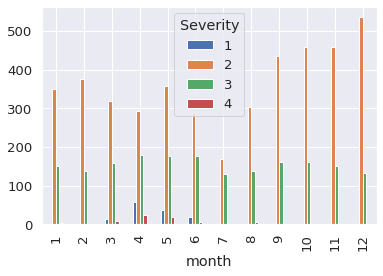

In [20]:
df.plot(x ='month', y='Severity', kind = 'scatter')
plt.show()
plott(df,'month','Severity')

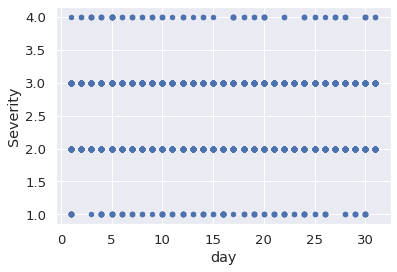

Severity   1    2   3   4
day                      
1         10  147  62   1
2          0  130  53   2
3          1  130  63   5
4          9  132  56   4
5          7  147  65  10
6          5  156  74   2
7          3  149  54   3
8          2  142  59   2
9          1  145  64   3
10         7  131  68   3
11         3  146  53   1
12         6  162  65   3
13         2  154  58   1
14         5  167  59   2
15         2  129  61   1
16        14  134  58   0
17         1  158  56   5
18         3  149  66   2
19         5  136  65   2
20         3  170  70   5
21         5  126  51   0
22         7  149  61   2
23         2  130  61   0
24         7  135  68   3
25         2  118  69   2
26         5  123  59   1
27         0  142  58   3
28         2  145  41   3
29         4  144  58   0
30         6  150  70   4
31         0   70  30   2


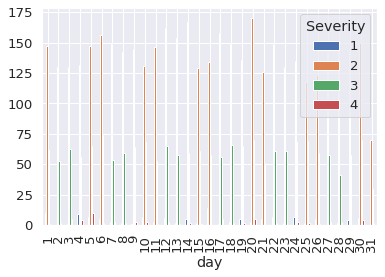

In [21]:
df.plot(x ='day', y='Severity', kind = 'scatter')
plt.show()
plott(df,'day','Severity')

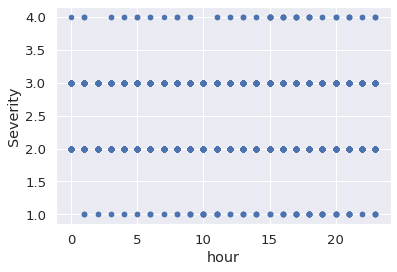

Severity   1    2    3   4
hour                      
0          0   61   51   1
1          3   84   34   3
2          2   85   61   0
3          2   53   37   2
4          2   70   32   2
5          2  118   51   3
6          4  162   78   2
7          2  213   91   1
8          3  231   84   3
9          6  271   90   2
10         9  166   63   0
11         9  167   79   2
12         3  192   87   2
13         5  229   86   3
14         5  296  117   2
15         4  310  120  11
16         6  295   90   7
17        10  348  115   7
18        13  315  129   7
19        11  206   96   2
20         8  131   72   4
21        12  115   65   5
22         2  107   74   2
23         6  121   53   4


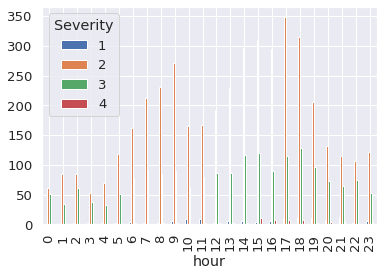

In [22]:
df.plot(x ='hour', y='Severity', kind = 'scatter')
plt.show()
plott(df,'hour','Severity')

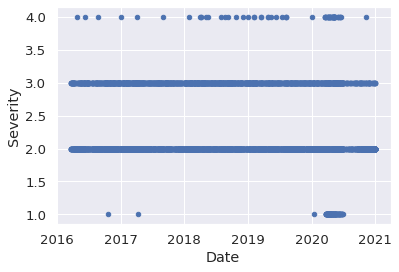

In [23]:
df.plot(x ='Date', y='Severity', kind = 'scatter')
plt.show()


# Holiday ----------------------------------------------------------

In [24]:
def read_xml(file_path):
    cols = ['date', 'description']
    rows = []

    # Parsing the XML file
    xmlparse = Xet.parse(file_path)
    root = xmlparse.getroot()

    for i in root:
        description = i.find("description").text
        date = i.find("date").text

        rows.append({"description": description,
                     "date": date})
    
    return pd.DataFrame(rows, columns=cols)

In [25]:
df_holiday = read_xml(os.path.join(dataset_path, 'holidays.xml'))

df_holiday

,date,description
0,2012-01-02,New Year Day
1,2012-01-16,Martin Luther King Jr. Day
2,2012-02-20,Presidents Day (Washingtons Birthday)
3,2012-05-28,Memorial Day
4,2012-07-04,Independence Day
...,...,...
85,2020-09-07,Labor Day
86,2020-10-12,Columbus Day
87,2020-11-11,Veterans Day
88,2020-11-26,Thanksgiving Day


In [26]:
df_holiday['description'].value_counts()

New Year Day                             9
Veterans Day                             9
Thanksgiving Day                         9
Christmas Day                            9
Columbus Day                             9
Memorial Day                             9
Presidents Day (Washingtons Birthday)    9
Independence Day                         9
Labor Day                                9
Martin Luther King Jr. Day               9
Name: description, dtype: int64

In [27]:
df_merged = pd.merge(df_holiday, df, left_on='date', right_on='timestamp_normal', how='right')

df_merged



,date,description,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,...,timestamp_normal,Date,day,month,year,hour,x,y,z,loc
0,NaN,NaN,37.762150,-122.405660,0.044,0,0,0,0,1,...,2016-03-25,2016-03-25 15:13:02,25,3,2016,15,-0.991254,-0.115960,0.062996,0.007241
1,NaN,NaN,37.719157,-122.448254,0.000,0,0,0,0,0,...,2020-05-05,2020-05-05 19:23:00,5,5,2020,19,-0.997073,-0.073778,0.020044,0.001474
2,NaN,NaN,37.808498,-122.366852,0.000,0,0,0,1,0,...,2016-09-16,2016-09-16 19:57:16,16,9,2016,19,-0.982066,-0.153714,0.109168,0.016480
3,NaN,NaN,37.785930,-122.391080,0.009,0,1,0,0,0,...,2020-03-29,2020-03-29 19:48:43,29,3,2020,19,-0.987693,-0.130167,0.086709,0.011148
4,NaN,NaN,37.719141,-122.448457,0.000,0,0,0,0,0,...,2019-10-09,2019-10-09 08:47:00,9,10,2019,8,-0.997089,-0.073575,0.020028,0.001469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,NaN,NaN,37.740630,-122.407930,0.368,0,0,0,0,0,...,2017-10-01,2017-10-01 18:36:13,1,10,2017,18,-0.992632,-0.113837,0.041506,0.004690
6403,NaN,NaN,37.752755,-122.402790,0.639,0,1,0,0,0,...,2018-10-23,2018-10-23 07:40:27,23,10,2018,7,-0.991461,-0.118869,0.053617,0.006319
6404,NaN,NaN,37.726304,-122.446015,0.000,0,1,0,0,0,...,2019-10-28,2019-10-28 15:45:00,28,10,2019,15,-0.996737,-0.075997,0.027189,0.002060
6405,NaN,NaN,37.808090,-122.367211,0.000,0,1,0,0,0,...,2019-05-04,2019-05-04 13:45:31,4,5,2019,13,-0.982165,-0.153369,0.108763,0.016383


In [28]:
df_merged['description'].describe()

count                                       148
unique                                       10
top       Presidents Day (Washingtons Birthday)
freq                                         23
Name: description, dtype: object

In [29]:
df_merged['description'] = df_merged['description'].apply(lambda x: 0 if x is np.nan else 1)
df_merged


,date,description,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,...,timestamp_normal,Date,day,month,year,hour,x,y,z,loc
0,NaN,0,37.762150,-122.405660,0.044,0,0,0,0,1,...,2016-03-25,2016-03-25 15:13:02,25,3,2016,15,-0.991254,-0.115960,0.062996,0.007241
1,NaN,0,37.719157,-122.448254,0.000,0,0,0,0,0,...,2020-05-05,2020-05-05 19:23:00,5,5,2020,19,-0.997073,-0.073778,0.020044,0.001474
2,NaN,0,37.808498,-122.366852,0.000,0,0,0,1,0,...,2016-09-16,2016-09-16 19:57:16,16,9,2016,19,-0.982066,-0.153714,0.109168,0.016480
3,NaN,0,37.785930,-122.391080,0.009,0,1,0,0,0,...,2020-03-29,2020-03-29 19:48:43,29,3,2020,19,-0.987693,-0.130167,0.086709,0.011148
4,NaN,0,37.719141,-122.448457,0.000,0,0,0,0,0,...,2019-10-09,2019-10-09 08:47:00,9,10,2019,8,-0.997089,-0.073575,0.020028,0.001469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,NaN,0,37.740630,-122.407930,0.368,0,0,0,0,0,...,2017-10-01,2017-10-01 18:36:13,1,10,2017,18,-0.992632,-0.113837,0.041506,0.004690
6403,NaN,0,37.752755,-122.402790,0.639,0,1,0,0,0,...,2018-10-23,2018-10-23 07:40:27,23,10,2018,7,-0.991461,-0.118869,0.053617,0.006319
6404,NaN,0,37.726304,-122.446015,0.000,0,1,0,0,0,...,2019-10-28,2019-10-28 15:45:00,28,10,2019,15,-0.996737,-0.075997,0.027189,0.002060
6405,NaN,0,37.808090,-122.367211,0.000,0,1,0,0,0,...,2019-05-04,2019-05-04 13:45:31,4,5,2019,13,-0.982165,-0.153369,0.108763,0.016383


In [30]:
df_merged['description'].describe()

count    6407.000000
mean        0.023100
std         0.150232
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: description, dtype: float64

Severity       1     2     3   4
description                     
0            129  4243  1810  77
1              0   103    45   0


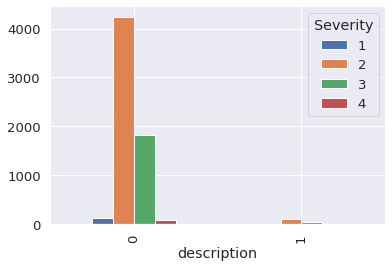

In [31]:
plott(df_merged,'description','Severity')

# Weather
1- Read Weather.csv as df


2- cast date in the weather_df and join with df

In [32]:
df_weather = pd.read_csv(os.path.join(dataset_path, 'weather-sfcsv.csv'))

print("The shape of the dataset is {}.\n\n".format(df_weather.shape))

df_weather.head()

The shape of the dataset is (6901, 12).




,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [33]:
df_weather['timestamp_weather'] = df_weather['Year'].astype(str) + '-' + df_weather['Month'].astype(str)  + '-' + df_weather['Day'].astype(str) + ' ' + df_weather['Hour'].astype(str)
df_weather['timestamp_weather']
df_weather['timestamp'] = df_weather['Year'].astype(str) + '-' + df_weather['Month'].astype(str)  + '-' + df_weather['Day'].astype(str)
df_weather['timestamp']
df_weather


,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,timestamp_weather,timestamp
0,2020,27,7,18,Fair,64.0,0.00,64.0,70.0,20.0,10.0,No,2020-7-27 18,2020-7-27
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No,2017-9-30 17,2017-9-30
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No,2017-6-27 5,2017-6-27
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No,2016-9-7 9,2016-9-7
4,2019,19,10,2,Fair,52.0,0.00,52.0,89.0,0.0,9.0,No,2019-10-19 2,2019-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,2018,23,1,21,Clear,NaN,NaN,51.1,80.0,3.5,10.0,No,2018-1-23 21,2018-1-23
6897,2019,16,6,7,Cloudy,56.0,0.00,56.0,80.0,9.0,9.0,No,2019-6-16 7,2019-6-16
6898,2017,7,2,4,Rain,NaN,0.07,61.0,90.0,32.2,7.0,No,2017-2-7 4,2017-2-7
6899,2016,22,4,16,Mostly Cloudy,NaN,NaN,61.0,67.0,21.9,10.0,No,2016-4-22 16,2016-4-22


In [34]:
weather_dict = {
    np.nan : 1,
    'Clear':                    1,
    'Fair':                     2,
    'Fair / Windy':             3,
    'Mist':                     4,
    'Shallow Fog':              5,
    'Haze':                     6,
    'Fog':                      7,
    'Smoke':                    8,
    'Partly Cloudy':            9,
    'Partly Cloudy / Windy':    10,
    'Mostly Cloudy':            11,
    'Mostly Cloudy / Windy':    12,
    'Scattered Clouds':         13,
    'Cloudy':                   14,
    'Cloudy / Windy':           15,
    'Overcast':                 16,
    'Light Rain':               17,
    'Light Rain / Windy':       18,
    'Rain':                     19,
    'Heavy Rain':               20
}

# apply using map
df_weather['Weather_Condition'] = df_weather['Weather_Condition'].map(weather_dict)
df_weather

,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,timestamp_weather,timestamp
0,2020,27,7,18,2.0,64.0,0.00,64.0,70.0,20.0,10.0,No,2020-7-27 18,2020-7-27
1,2017,30,9,17,9.0,NaN,NaN,71.1,57.0,9.2,10.0,No,2017-9-30 17,2017-9-30
2,2017,27,6,5,16.0,NaN,NaN,57.9,87.0,15.0,9.0,No,2017-6-27 5,2017-6-27
3,2016,7,9,9,1.0,NaN,NaN,66.9,73.0,4.6,10.0,No,2016-9-7 9,2016-9-7
4,2019,19,10,2,2.0,52.0,0.00,52.0,89.0,0.0,9.0,No,2019-10-19 2,2019-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,2018,23,1,21,1.0,NaN,NaN,51.1,80.0,3.5,10.0,No,2018-1-23 21,2018-1-23
6897,2019,16,6,7,14.0,56.0,0.00,56.0,80.0,9.0,9.0,No,2019-6-16 7,2019-6-16
6898,2017,7,2,4,19.0,NaN,0.07,61.0,90.0,32.2,7.0,No,2017-2-7 4,2017-2-7
6899,2016,22,4,16,11.0,NaN,NaN,61.0,67.0,21.9,10.0,No,2016-4-22 16,2016-4-22


In [35]:
df_weather=df_weather.dropna()

df_weather.drop_duplicates(subset=['timestamp_weather'], keep='first',inplace=True)


In [36]:
df_weather


,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,timestamp_weather,timestamp
0,2020,27,7,18,2.0,64.0,0.0,64.0,70.0,20.0,10.0,No,2020-7-27 18,2020-7-27
4,2019,19,10,2,2.0,52.0,0.0,52.0,89.0,0.0,9.0,No,2019-10-19 2,2019-10-19
5,2019,1,9,17,9.0,74.0,0.0,74.0,62.0,10.0,10.0,No,2019-9-1 17,2019-9-1
6,2020,3,8,13,9.0,75.0,0.0,75.0,51.0,13.0,10.0,No,2020-8-3 13,2020-8-3
7,2019,8,10,13,11.0,73.0,0.0,73.0,53.0,13.0,10.0,No,2019-10-8 13,2019-10-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,2019,31,10,1,2.0,51.0,0.0,51.0,35.0,5.0,10.0,No,2019-10-31 1,2019-10-31
6891,2020,17,9,4,14.0,61.0,0.0,61.0,97.0,5.0,3.0,No,2020-9-17 4,2020-9-17
6893,2019,26,8,8,2.0,61.0,0.0,61.0,78.0,3.0,10.0,No,2019-8-26 8,2019-8-26
6894,2019,5,6,17,12.0,65.0,0.0,65.0,61.0,23.0,10.0,No,2019-6-5 17,2019-6-5


In [37]:
df_weather = df_weather.drop(columns=['Year','Day','Month','Hour'])


df_final = pd.merge(df_weather, df_merged, left_on='timestamp_weather', right_on='timestamp_hour', how='right')

df_final


,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,timestamp_weather,timestamp_x,...,timestamp_normal,Date,day,month,year,hour,x,y,z,loc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-03-25,2016-03-25 15:13:02,25,3,2016,15,-0.991254,-0.115960,0.062996,0.007241
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-05-05,2020-05-05 19:23:00,5,5,2020,19,-0.997073,-0.073778,0.020044,0.001474
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-09-16,2016-09-16 19:57:16,16,9,2016,19,-0.982066,-0.153714,0.109168,0.016480
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-03-29,2020-03-29 19:48:43,29,3,2020,19,-0.987693,-0.130167,0.086709,0.011148
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-10-09,2019-10-09 08:47:00,9,10,2019,8,-0.997089,-0.073575,0.020028,0.001469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-10-01,2017-10-01 18:36:13,1,10,2017,18,-0.992632,-0.113837,0.041506,0.004690
6403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-10-23,2018-10-23 07:40:27,23,10,2018,7,-0.991461,-0.118869,0.053617,0.006319
6404,2.0,71.0,0.0,71.0,16.0,9.0,10.0,No,2019-10-28 15,2019-10-28,...,2019-10-28,2019-10-28 15:45:00,28,10,2019,15,-0.996737,-0.075997,0.027189,0.002060
6405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-05-04,2019-05-04 13:45:31,4,5,2019,13,-0.982165,-0.153369,0.108763,0.016383


In [38]:
names=['Weather_Condition',"Wind_Chill(F)",'Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','Visibility(mi)']

for i in names:
    df_final[i].fillna(df_final[i].median(), inplace=True)
df_final

df_final

,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,timestamp_weather,timestamp_x,...,timestamp_normal,Date,day,month,year,hour,x,y,z,loc
0,6.0,58.0,0.0,58.0,67.0,8.0,10.0,NaN,NaN,NaN,...,2016-03-25,2016-03-25 15:13:02,25,3,2016,15,-0.991254,-0.115960,0.062996,0.007241
1,6.0,58.0,0.0,58.0,67.0,8.0,10.0,NaN,NaN,NaN,...,2020-05-05,2020-05-05 19:23:00,5,5,2020,19,-0.997073,-0.073778,0.020044,0.001474
2,6.0,58.0,0.0,58.0,67.0,8.0,10.0,NaN,NaN,NaN,...,2016-09-16,2016-09-16 19:57:16,16,9,2016,19,-0.982066,-0.153714,0.109168,0.016480
3,6.0,58.0,0.0,58.0,67.0,8.0,10.0,NaN,NaN,NaN,...,2020-03-29,2020-03-29 19:48:43,29,3,2020,19,-0.987693,-0.130167,0.086709,0.011148
4,6.0,58.0,0.0,58.0,67.0,8.0,10.0,NaN,NaN,NaN,...,2019-10-09,2019-10-09 08:47:00,9,10,2019,8,-0.997089,-0.073575,0.020028,0.001469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,6.0,58.0,0.0,58.0,67.0,8.0,10.0,NaN,NaN,NaN,...,2017-10-01,2017-10-01 18:36:13,1,10,2017,18,-0.992632,-0.113837,0.041506,0.004690
6403,6.0,58.0,0.0,58.0,67.0,8.0,10.0,NaN,NaN,NaN,...,2018-10-23,2018-10-23 07:40:27,23,10,2018,7,-0.991461,-0.118869,0.053617,0.006319
6404,2.0,71.0,0.0,71.0,16.0,9.0,10.0,No,2019-10-28 15,2019-10-28,...,2019-10-28,2019-10-28 15:45:00,28,10,2019,15,-0.996737,-0.075997,0.027189,0.002060
6405,6.0,58.0,0.0,58.0,67.0,8.0,10.0,NaN,NaN,NaN,...,2019-05-04,2019-05-04 13:45:31,4,5,2019,13,-0.982165,-0.153369,0.108763,0.016383


In [39]:
names=['Weather_Condition',"Wind_Chill(F)",'Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','Visibility(mi)']

for i in names:
    df_final[i]=normalize_column(df_final,i)
    

names=['day','month','year','hour','x','y','z','loc']
for i in names:
    df_final[i]=normalize_column(df_final,i)
    

In [40]:
df_final

,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,timestamp_weather,timestamp_x,...,timestamp_normal,Date,day,month,year,hour,x,y,z,loc
0,0.222222,0.415094,0.0,0.367347,0.655172,0.25000,1.0,NaN,NaN,NaN,...,2016-03-25,2016-03-25 15:13:02,0.800000,0.181818,0.00,0.652174,0.377056,0.342512,0.706887,0.597376
1,0.222222,0.415094,0.0,0.367347,0.655172,0.25000,1.0,NaN,NaN,NaN,...,2020-05-05,2020-05-05 19:23:00,0.133333,0.363636,1.00,0.826087,0.100879,0.608393,0.507618,0.413866
2,0.222222,0.415094,0.0,0.367347,0.655172,0.25000,1.0,NaN,NaN,NaN,...,2016-09-16,2016-09-16 19:57:16,0.500000,0.727273,0.00,0.826087,0.813112,0.104539,0.921091,0.891369
3,0.222222,0.415094,0.0,0.367347,0.655172,0.25000,1.0,NaN,NaN,NaN,...,2020-03-29,2020-03-29 19:48:43,0.933333,0.181818,1.00,0.826087,0.546052,0.252963,0.816898,0.721692
4,0.222222,0.415094,0.0,0.367347,0.655172,0.25000,1.0,NaN,NaN,NaN,...,2019-10-09,2019-10-09 08:47:00,0.266667,0.818182,0.75,0.347826,0.100154,0.609668,0.507544,0.413701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,0.222222,0.415094,0.0,0.367347,0.655172,0.25000,1.0,NaN,NaN,NaN,...,2017-10-01,2017-10-01 18:36:13,0.000000,0.818182,0.25,0.782609,0.311663,0.355889,0.607188,0.516197
6403,0.222222,0.415094,0.0,0.367347,0.655172,0.25000,1.0,NaN,NaN,NaN,...,2018-10-23,2018-10-23 07:40:27,0.733333,0.818182,0.50,0.304348,0.367231,0.324172,0.663376,0.568032
6404,0.000000,0.660377,0.0,0.632653,0.068966,0.28125,1.0,No,2019-10-28 15,2019-10-28,...,2019-10-28,2019-10-28 15:45:00,0.900000,0.818182,0.75,0.652174,0.116825,0.594403,0.540766,0.432484
6405,0.222222,0.415094,0.0,0.367347,0.655172,0.25000,1.0,NaN,NaN,NaN,...,2019-05-04,2019-05-04 13:45:31,0.100000,0.363636,0.75,0.565217,0.808411,0.106718,0.919210,0.888298


In [41]:

# playing with model
df_selected = df_final[[
'description',
'Crossing',
'Junction',
'Railway',
'Stop',
#'Amenity',
'Side',
#'loc',
'x',
'y',
'z',
#'Lat',
# 'Lng',
'Distance(mi)',
'Severity',
'day' ,
#'month',
'year',
#'hour',
'Weather_Condition',
"Wind_Chill(F)",
'Precipitation(in)',
'Temperature(F)',
'Humidity(%)',
'Wind_Speed(mph)',
'Visibility(mi)'
]]

[ 'Distance(mi)', 'year',   'description', 'y', 'Crossing', 'loc' ]  

classifier = RandomForestClassifier(max_depth=2, random_state=0)
cv = KFold(n_splits=5, random_state=1, shuffle=True) 


#build multiple linear regression model
X = df_selected.drop(columns=['Severity'])
y = df_selected['Severity']


#use LOOCV to evaluate model
scores = cross_val_score(classifier, X, y,
                         cv=cv, n_jobs=-1)
print(scores)


[0.75663027 0.72620905 0.73848556 0.74238876 0.7431694 ]


In [42]:
print(np.mean(scores))

0.7413766058839075


In [43]:
# val_df >> test_df                -   X_train, X_test, y_train, y_test
train_df, val_df = train_test_split(df_selected, test_size=.2, random_state=42) 

X_train = train_df.drop(columns=['Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['Severity'])
y_val = val_df['Severity']

classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7464898595943837


# 3- Data Visualization and Preprocessing

# Model Training

In [44]:
# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7464898595943837


# Test ---------------------------------

In [45]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,8003,37.812973,-122.362335,False,4.460,False,False,False,False,False,False,False,False,R,2020-06-26 22:32:22
1597,8004,37.761818,-122.405861,False,0.010,False,False,True,False,False,False,False,False,R,2016-12-03 07:16:30
1598,8005,37.732260,-122.431970,False,0.431,False,False,True,False,False,False,False,False,R,2017-02-20 06:32:44
1599,8006,37.786782,-122.390126,False,0.000,True,False,False,False,False,False,False,False,R,2019-10-31 20:35:00


In [46]:
test_df = test_df.drop(columns=[ 'Bump', 'No_Exit', 'Give_Way', 'Roundabout'])

test_df['timestamp_hour'] = pd.to_datetime(test_df['timestamp'])
test_df['timestamp_hour'] = test_df['timestamp_hour'].dt.strftime('%Y-%m-%d %H')
test_df

,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,timestamp,timestamp_hour
0,6407,37.786060,-122.390900,0.039,False,True,False,False,False,R,2016-04-04 19:20:31,2016-04-04 19
1,6408,37.769609,-122.415057,0.202,False,False,False,False,False,R,2020-10-28 11:51:00,2020-10-28 11
2,6409,37.807495,-122.476021,0.000,False,False,False,False,False,R,2019-09-09 07:36:45,2019-09-09 07
3,6410,37.761818,-122.405869,0.000,False,True,False,False,False,R,2019-08-06 15:46:25,2019-08-06 15
4,6411,37.732350,-122.414100,0.670,False,False,False,False,False,R,2018-10-17 09:54:58,2018-10-17 09
...,...,...,...,...,...,...,...,...,...,...,...,...
1596,8003,37.812973,-122.362335,4.460,False,False,False,False,False,R,2020-06-26 22:32:22,2020-06-26 22
1597,8004,37.761818,-122.405861,0.010,False,True,False,False,False,R,2016-12-03 07:16:30,2016-12-03 07
1598,8005,37.732260,-122.431970,0.431,False,True,False,False,False,R,2017-02-20 06:32:44,2017-02-20 06
1599,8006,37.786782,-122.390126,0.000,True,False,False,False,False,R,2019-10-31 20:35:00,2019-10-31 20


In [47]:
test_df = encoding(test_df, ['Crossing', 'Junction', 'Railway', 'Stop', 'Amenity', 'Side'])
test_df

,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,timestamp,timestamp_hour
0,6407,37.786060,-122.390900,0.039,0,1,0,0,0,0,2016-04-04 19:20:31,2016-04-04 19
1,6408,37.769609,-122.415057,0.202,0,0,0,0,0,0,2020-10-28 11:51:00,2020-10-28 11
2,6409,37.807495,-122.476021,0.000,0,0,0,0,0,0,2019-09-09 07:36:45,2019-09-09 07
3,6410,37.761818,-122.405869,0.000,0,1,0,0,0,0,2019-08-06 15:46:25,2019-08-06 15
4,6411,37.732350,-122.414100,0.670,0,0,0,0,0,0,2018-10-17 09:54:58,2018-10-17 09
...,...,...,...,...,...,...,...,...,...,...,...,...
1596,8003,37.812973,-122.362335,4.460,0,0,0,0,0,0,2020-06-26 22:32:22,2020-06-26 22
1597,8004,37.761818,-122.405861,0.010,0,1,0,0,0,0,2016-12-03 07:16:30,2016-12-03 07
1598,8005,37.732260,-122.431970,0.431,0,1,0,0,0,0,2017-02-20 06:32:44,2017-02-20 06
1599,8006,37.786782,-122.390126,0.000,1,0,0,0,0,0,2019-10-31 20:35:00,2019-10-31 20


In [48]:
df_merged = pd.merge(df_holiday, test_df, left_on='date', right_on='timestamp', how='right')
df_merged['description'] = df_merged['description'].apply(lambda x: 0 if x is np.nan else 1)
df_merged = df_merged.drop(['date'], axis = 1)
df_merged

df=df_merged

In [49]:

df['Date']= pd.to_datetime(df['timestamp'])


df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['hour'] = df['Date'].dt.hour


df['x']=np.cos(df['Lat']) * np.cos(df['Lng'])
df['y']=np.cos(df['Lat']) * np.sin(df['Lng'])
df['z']=np.sin(df['Lat'])
df['loc']=df['x']*df['y']*df['z']

df

,description,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,...,timestamp_hour,Date,day,month,year,hour,x,y,z,loc
0,0,6407,37.786060,-122.390900,0.039,0,1,0,0,0,...,2016-04-04 19,2016-04-04 19:20:31,4,4,2016,19,-0.987659,-0.130343,0.086839,0.011179
1,0,6408,37.769609,-122.415057,0.202,0,0,0,0,0,...,2020-10-28 11,2020-10-28 11:51:00,28,10,2020,11,-0.991805,-0.106587,0.070439,0.007446
2,0,6409,37.807495,-122.476021,0.000,0,0,0,0,0,...,2019-09-09 07,2019-09-09 07:36:45,9,9,2019,7,-0.993076,-0.045806,0.108171,0.004921
3,0,6410,37.761818,-122.405869,0.000,0,1,0,0,0,...,2019-08-06 15,2019-08-06 15:46:25,6,8,2019,15,-0.991299,-0.115755,0.062665,0.007191
4,0,6411,37.732350,-122.414100,0.670,0,0,0,0,0,...,2018-10-17 09,2018-10-17 09:54:58,17,10,2018,9,-0.993623,-0.107744,0.033232,0.003558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0,8003,37.812973,-122.362335,4.460,0,0,0,0,0,...,2020-06-26 22,2020-06-26 22:32:22,26,6,2020,22,-0.980870,-0.158069,0.113615,0.017616
1597,0,8004,37.761818,-122.405861,0.010,0,1,0,0,0,...,2016-12-03 07,2016-12-03 07:16:30,3,12,2016,7,-0.991298,-0.115763,0.062665,0.007191
1598,0,8005,37.732260,-122.431970,0.431,0,1,0,0,0,...,2017-02-20 06,2017-02-20 06:32:44,20,2,2017,6,-0.995393,-0.089972,0.033142,0.002968
1599,0,8006,37.786782,-122.390126,0.000,1,0,0,0,0,...,2019-10-31 20,2019-10-31 20:35:00,31,10,2019,20,-0.987495,-0.131099,0.087558,0.011335


In [50]:
df_final = pd.merge(df_weather, df, left_on='timestamp_weather', right_on='timestamp_hour', how='right')

df_final

,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,timestamp_weather,timestamp_x,...,timestamp_hour,Date,day,month,year,hour,x,y,z,loc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-04-04 19,2016-04-04 19:20:31,4,4,2016,19,-0.987659,-0.130343,0.086839,0.011179
1,2.0,65.0,0.0,65.0,56.0,5.0,9.0,No,2020-10-28 11,2020-10-28,...,2020-10-28 11,2020-10-28 11:51:00,28,10,2020,11,-0.991805,-0.106587,0.070439,0.007446
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-09-09 07,2019-09-09 07:36:45,9,9,2019,7,-0.993076,-0.045806,0.108171,0.004921
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-08-06 15,2019-08-06 15:46:25,6,8,2019,15,-0.991299,-0.115755,0.062665,0.007191
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-10-17 09,2018-10-17 09:54:58,17,10,2018,9,-0.993623,-0.107744,0.033232,0.003558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-06-26 22,2020-06-26 22:32:22,26,6,2020,22,-0.980870,-0.158069,0.113615,0.017616
1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-12-03 07,2016-12-03 07:16:30,3,12,2016,7,-0.991298,-0.115763,0.062665,0.007191
1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-02-20 06,2017-02-20 06:32:44,20,2,2017,6,-0.995393,-0.089972,0.033142,0.002968
1599,2.0,55.0,0.0,55.0,40.0,0.0,10.0,No,2019-10-31 20,2019-10-31,...,2019-10-31 20,2019-10-31 20:35:00,31,10,2019,20,-0.987495,-0.131099,0.087558,0.011335


In [51]:
names=['Weather_Condition',"Wind_Chill(F)",'Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','Visibility(mi)']

for i in names:
    df_final[i].fillna(df_final[i].median(), inplace=True)
df_final

df_final.describe()

,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),description,ID,Lat,...,Amenity,Side,day,month,year,hour,x,y,z,loc
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.0,1601.000000,1601.000000,...,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,8.891943,58.151780,0.000356,58.156777,68.449094,8.040600,9.937539,0.0,7207.000000,37.765552,...,0.041849,0.058089,15.231730,6.865709,2018.352904,12.861337,-0.990187,-0.115418,0.066359,0.007960
std,1.712145,2.550995,0.004867,2.529037,6.699632,1.768184,0.537211,0.0,462.313206,0.031883,...,0.200306,0.233984,8.782975,3.597058,1.425134,5.845042,0.004533,0.027815,0.031808,0.004943
min,2.000000,45.000000,0.000000,47.000000,12.000000,0.000000,3.000000,0.0,6407.000000,37.614687,...,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,-0.998979,-0.161787,-0.084325,-0.010639
25%,9.000000,58.000000,0.000000,58.000000,69.000000,8.000000,10.000000,0.0,6807.000000,37.735352,...,0.000000,0.000000,8.000000,4.000000,2017.000000,8.000000,-0.992649,-0.129153,0.036232,0.004079
50%,9.000000,58.000000,0.000000,58.000000,69.000000,8.000000,10.000000,0.0,7207.000000,37.768710,...,0.000000,0.000000,15.000000,7.000000,2019.000000,14.000000,-0.991209,-0.116754,0.069542,0.007329
75%,9.000000,58.000000,0.000000,58.000000,69.000000,8.000000,10.000000,0.0,7607.000000,37.786995,...,0.000000,0.000000,23.000000,10.000000,2020.000000,17.000000,-0.988123,-0.107630,0.087770,0.010776
max,20.000000,85.000000,0.100000,85.000000,93.000000,22.000000,10.000000,0.0,8007.000000,37.819321,...,1.000000,1.000000,31.000000,12.000000,2020.000000,23.000000,-0.980026,-0.011649,0.119920,0.018337


In [52]:
names=['Weather_Condition',"Wind_Chill(F)",'Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','Visibility(mi)']

for i in names:
    df_final[i]=normalize_column(df_final,i)
    

names=['day','month','year','hour','x','y','z','loc']
for i in names:
    df_final[i]=normalize_column(df_final,i)
    

In [53]:
df_selected = df_final[[
'description',
'Crossing',
'Junction',
'Railway',
'Stop',
#'Amenity',
'Side',
#'loc',
'x',
'y',
'z',
#'Lat',
# 'Lng',
'Distance(mi)',
'day' ,
#'month',
'year',
#'hour',
'Weather_Condition',
"Wind_Chill(F)",
'Precipitation(in)',
'Temperature(F)',
'Humidity(%)',
'Wind_Speed(mph)',
'Visibility(mi)'
]]

In [54]:
# test_df = pd.DataFrame(test_df)
# test_df
y_test_predicted = classifier.predict(df_selected)
y_test_predicted

array([2, 2, 2, ..., 2, 2, 2])

In [55]:
df_selected['Severity'] = y_test_predicted
df_selected.head()

df_selected['ID']=df_final['ID']

In [56]:
df_selected[['ID', 'Severity']].to_csv('submission2.csv', index=False)

In [57]:
# # You should update/remove the next line once you change the features used for training
# X_test = X_test[['Lat', 'Lng', 'Distance(mi)']]

# y_test_predicted = classifier.predict(X_test)

# test_df['Severity'] = y_test_predicted

# test_df.head()

In [58]:
# test_df[['ID', 'Severity']].to_csv(dataset_path+'\submission.csv', index=False)